# Model Training for Dogs vs Cats Dataset

## Import necessary libraries

In [69]:
import pathlib
import os
import shutil
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np



In [70]:
from dogs_cats import DogsCats

In [71]:
dogs_cats = DogsCats()

### Create the 'dogs-vs-cats' directory using make_dataset_folders()

In [ ]:

dogs_cats.make_dataset_folders('validation', 0, 2400)
dogs_cats.make_dataset_folders('train', 2400, 12000)
dogs_cats.make_dataset_folders('test', 12000, 12500)

src: dogs-vs-cats-original\train\train\dog.0.jpg => dst: dogs-vs-cats\validation\dog\dog.0.jpg
src: dogs-vs-cats-original\train\train\dog.100.jpg => dst: dogs-vs-cats\validation\dog\dog.100.jpg
src: dogs-vs-cats-original\train\train\dog.200.jpg => dst: dogs-vs-cats\validation\dog\dog.200.jpg
src: dogs-vs-cats-original\train\train\dog.300.jpg => dst: dogs-vs-cats\validation\dog\dog.300.jpg
src: dogs-vs-cats-original\train\train\dog.400.jpg => dst: dogs-vs-cats\validation\dog\dog.400.jpg
src: dogs-vs-cats-original\train\train\dog.500.jpg => dst: dogs-vs-cats\validation\dog\dog.500.jpg
src: dogs-vs-cats-original\train\train\dog.600.jpg => dst: dogs-vs-cats\validation\dog\dog.600.jpg
src: dogs-vs-cats-original\train\train\dog.700.jpg => dst: dogs-vs-cats\validation\dog\dog.700.jpg
src: dogs-vs-cats-original\train\train\dog.800.jpg => dst: dogs-vs-cats\validation\dog\dog.800.jpg
src: dogs-vs-cats-original\train\train\dog.900.jpg => dst: dogs-vs-cats\validation\dog\dog.900.jpg
src: dogs-vs-c

In [5]:
# Make Dataset objects using make_dataset()
dogs_cats.make_dataset()

Found 19200 files belonging to 2 classes.
Found 4800 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


## Build a neural network using build_network()

In [6]:
# Build a neural network using build_network()
dogs_cats.build_network()


In [7]:
# Show the neural network model using model.summary()
dogs_cats.model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 average_pooling2d (AverageP  (None, 89, 89, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                             

## Training the model

Epoch 1/20
600/600 [==============================] - 857s 1s/step - loss: 0.6870 - accuracy: 0.5376 - val_loss: 0.6912 - val_accuracy: 0.5362
Epoch 2/20
600/600 [==============================] - 736s 1s/step - loss: 0.6709 - accuracy: 0.5855 - val_loss: 0.6455 - val_accuracy: 0.6167
Epoch 3/20
600/600 [==============================] - 664s 1s/step - loss: 0.6248 - accuracy: 0.6388 - val_loss: 0.5714 - val_accuracy: 0.6996
Epoch 4/20
600/600 [==============================] - 675s 1s/step - loss: 0.5747 - accuracy: 0.6973 - val_loss: 0.5373 - val_accuracy: 0.7283
Epoch 5/20
600/600 [==============================] - 673s 1s/step - loss: 0.5492 - accuracy: 0.7180 - val_loss: 0.5225 - val_accuracy: 0.7385
Epoch 6/20
600/600 [==============================] - 664s 1s/step - loss: 0.5342 - accuracy: 0.7292 - val_loss: 0.5163 - val_accuracy: 0.7483
Epoch 7/20
600/600 [==============================] - 663s 1s/step - loss: 0.5165 - accuracy: 0.7436 - val_loss: 0.4881 - val_accuracy: 0.7667

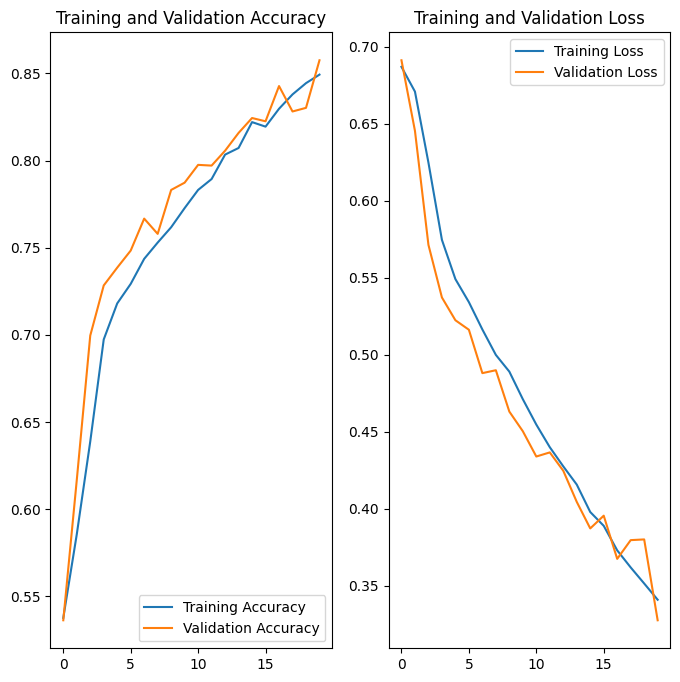

In [8]:
dogs_cats.train('model.dogs-cats')

In [17]:
base_dir = pathlib.Path('dogs-vs-cats')
src_dir = pathlib.Path('dogs-vs-cats-original/train')

In [9]:
print(base_dir / 'test')

dogs-vs-cats\test


### Load the test dataset from the 'dogs-vs-cats/test' directory

In [10]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir /'test',
    image_size=(180,180),
    batch_size=32
)

Found 1000 files belonging to 2 classes.


### Because of model size greater than mb loading the model from Google Drive link using gdown library

In [38]:
import gdown

url = 'https://drive.google.com/uc?id=1lQS_SVJkGquJdC3f6W1nANw5GnfCxymu'
output = 'my_model.keras'  # Replace with the desired output filename
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1lQS_SVJkGquJdC3f6W1nANw5GnfCxymu
To: c:\Users\shubdosh\Desktop\ece5831\10\my_model.keras
100%|██████████| 54.5M/54.5M [00:02<00:00, 21.6MB/s]


'my_model.keras'

In [39]:
# Save it without optimizer states to reduce size
model = tf.keras.models.load_model('my_model.keras')

### Predict the class of images in the test dataset

In [41]:
for image_batch, labels_batch in test_dataset:
    predictions = model.predict(test_dataset)

32/32 [==============================] - 10s 316ms/step


In [43]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

32/32 [==============================] - 7s 204ms/step - loss: 0.3399 - accuracy: 0.8540
Test accuracy: 85.40%


In [73]:
CLASS_NAMES = ['dog', 'cat']
IMAGE_SHAPE = (180, 180, 3)

In [121]:
def predict(image_file):
        from PIL import Image
        import numpy as np
        
        # Load the image
        image = Image.open(image_file)

        # Ensure image is RGB
        if image.mode != 'RGB':
            image = image.convert('RGB')
        
        # Resize the image
        image = image.resize(IMAGE_SHAPE[:2])

        # Normalize the image
        image_np = np.array(image).astype(np.float32) / 255.0
        print("Image shape after resizing and converting to numpy:", image_np.shape)

        # Ensure the image matches the expected shape
        image_np = image_np.reshape(1, *IMAGE_SHAPE)

        # Make a prediction
        prediction = model.predict(image_np)
        predicted_class = CLASS_NAMES[int(prediction[0] > 0.5)]
        plt.imshow(image, cmap='gray')
        plt.title(f'Predicted: {predicted_class}')
        plt.axis('off')
        plt.show()
        print(f'Prediction: {predicted_class}')

Image shape after resizing and converting to numpy: (180, 180, 3)
1/1 [==============================] - 0s 130ms/step


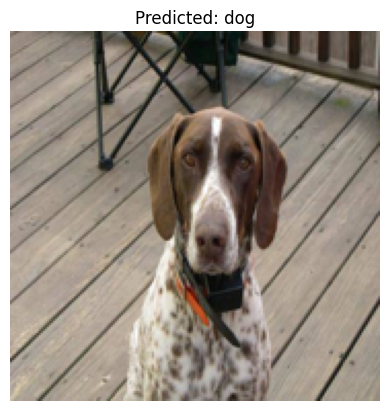

Prediction: dog


In [122]:
predict(r'dogs-vs-cats/test/dog/dog.12242.jpg') #replace with the path to the image you want to predict